In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
import pickle 


### Get Data


In [3]:
#reading csv file
df = pd.read_csv("Datasets/fan_0db.csv")
df.shape

(5550, 16)

In [4]:
df.head()

,file_name,y_min,y_max,y_mean,y_std,zcr_mean,zcr_min,zcr_max,spec_cent_min,spec_cent_mean,rms_mean,amp_mean,amp_min,melspec_mean,melspec_std,class
0,Audio_Files/0dB_fan/id_00/abnormal/00000059.wav,-0.032230,0.029817,-6.926849e-07,0.009295,0.031904,0.016113,0.054688,1056.230929,1195.770358,0.009263,0.020296,0.012419,0.020323,0.119019,1
1,Audio_Files/0dB_fan/id_00/abnormal/00000071.wav,-0.034450,0.028665,-6.027881e-07,0.009493,0.021894,0.009766,0.034668,703.965079,800.327823,0.009442,0.020580,0.013375,0.021241,0.128594,1
2,Audio_Files/0dB_fan/id_00/abnormal/00000065.wav,-0.034897,0.028662,5.634240e-06,0.009543,0.027962,0.010742,0.047852,871.776362,998.865525,0.009508,0.020938,0.015119,0.021519,0.125431,1
3,Audio_Files/0dB_fan/id_00/abnormal/00000273.wav,-0.024785,0.026773,5.817374e-07,0.006059,0.057802,0.017578,0.087402,1112.632569,1419.440256,0.006014,0.016007,0.010261,0.008460,0.032597,1
4,Audio_Files/0dB_fan/id_00/abnormal/00000267.wav,-0.034780,0.037046,1.282572e-06,0.004874,0.049731,0.016602,0.279785,771.766407,1154.008254,0.004715,0.012308,0.005732,0.005148,0.024881,1


In [5]:
# drop unnecessary data
df = df.drop(columns = 'file_name')

X = df.drop(columns = 'class')
y = df['class']


In [6]:
count = df['class'].value_counts()
count

0    4075
1    1475
Name: class, dtype: int64

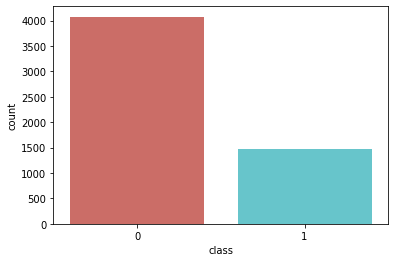

In [7]:
sns.countplot(x='class',data= df, palette= 'hls')
plt.show()

### Split Data

In [8]:
# Split dataset train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Standard Scaler

- Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### GaussianNB

In [10]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

- Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

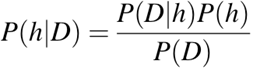

In [11]:
# Predict
y_pred = classifier.predict(X_test)


In [12]:
#Evaluation of the model

print('Test accuracy for NB is:',metrics.accuracy_score(y_test,y_pred)*100)

Test accuracy for NB is: 78.01801801801803


In [13]:
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,y_pred))


Confusion matrix:
 [[727  70]
 [174 139]]


In [14]:
print('\n Classification Report: \n',metrics.classification_report(y_test,y_pred))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       797
           1       0.67      0.44      0.53       313

    accuracy                           0.78      1110
   macro avg       0.74      0.68      0.69      1110
weighted avg       0.77      0.78      0.77      1110



### Overfitting 

In [15]:
def check_overfitting(range_number):
    train_scores, test_scores = list(), list()
    values = [i for i in range(1, range_number)]
    for i in values:
        model = GaussianNB()
        model.fit(X_train, y_train)
        # train accuracy 
        x_pred = model.predict(X_train)
        train_acc = metrics.accuracy_score(y_train, x_pred)
        train_scores.append(train_acc)
        #test accuracy
        y_pred = model.predict(X_test)
        test_acc = metrics.accuracy_score(y_test, y_pred)
        test_scores.append(test_acc)
        print("{},    Train: {},   Test: {}".format(i, train_acc, test_acc))
        
    plt.plot(values, train_scores, '-o', label='Train')
    plt.plot(values, test_scores, '-o', label='Test')
    plt.legend()
    plt.show()

1,    Train: 0.8087837837837838,   Test: 0.7801801801801802
2,    Train: 0.8087837837837838,   Test: 0.7801801801801802
3,    Train: 0.8087837837837838,   Test: 0.7801801801801802
4,    Train: 0.8087837837837838,   Test: 0.7801801801801802
5,    Train: 0.8087837837837838,   Test: 0.7801801801801802
6,    Train: 0.8087837837837838,   Test: 0.7801801801801802
7,    Train: 0.8087837837837838,   Test: 0.7801801801801802
8,    Train: 0.8087837837837838,   Test: 0.7801801801801802
9,    Train: 0.8087837837837838,   Test: 0.7801801801801802


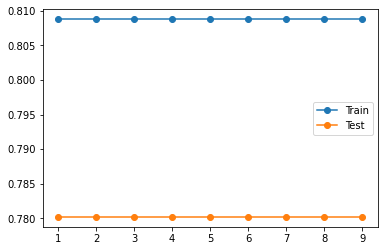

In [16]:
check_overfitting(10)

### Feature Selection

- Variance Threshold Feature Selection
- Univariate Selection using SelectKBest
- Recursive Feature Elimination or RFE
- SelectFromModel
- Sequential Feature Selection or SFS


All results are same with Logistic regression 

### Create New Model With Reduces Features


In [17]:
X = df[['y_std', 'rms_mean', 'amp_mean', 'melspec_mean', 'spec_cent_mean']]
y = df['class']

### Split Data

In [18]:
# Split dataset train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### Feature Scaling : Standard Scaler

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model

In [20]:
print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

classifier = GaussianNB()
classifier.fit(X_train, y_train)

training set size: 4440 samples 
test set size: 1110 samples


GaussianNB()

In [21]:
y_pred = classifier.predict(X_test)


### Evaluation

In [22]:
print('Test accuracy for NB is:',metrics.accuracy_score(y_test,y_pred)*100)

Test accuracy for NB is: 79.63963963963964


In [23]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print('\nConfusion matrix:\n',cnf_matrix)


Confusion matrix:
 [[755  61]
 [165 129]]


In [24]:
print('\n Classification Report: \n',metrics.classification_report(y_test,y_pred))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       816
           1       0.68      0.44      0.53       294

    accuracy                           0.80      1110
   macro avg       0.75      0.68      0.70      1110
weighted avg       0.78      0.80      0.78      1110



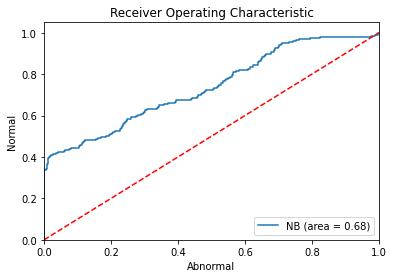

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test,classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Abnormal')
plt.ylabel('Normal')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curve_NB')
plt.show()

### Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv=10)
AccuraciesMean = accuracies.mean()*100
StandardDeviation = accuracies.std()*100

print("%0.2f mean accuracy with a standard deviation of %0.2f" % (AccuraciesMean, StandardDeviation))


74.74 mean accuracy with a standard deviation of 2.18


In [27]:
accuracies

array([0.78738739, 0.77297297, 0.78018018, 0.73153153, 0.73333333,
       0.73513514, 0.73513514, 0.73333333, 0.72972973, 0.73513514])

### Create a model


In [ ]:
# save model
filename = 'fan_0db_NB.sav'
pickle.dump(classifier, open(filename, 'wb'))


In [ ]:
# try model
rf_model = pickle.load(open(filename, 'rb'))


In [ ]:
result = rf_model.predict(X_test)

In [ ]:
result